# Analysis 5 - Number of Reviews v.s. Price

In [2]:
#Now let's take a look at the number of reviews vs price

import numpy as np
import pandas as pd

reviews=pd.read_csv('../finaldata/reviews_all.csv',encoding = "ISO-8859-1",low_memory=False)
listings=pd.read_csv('../finaldata/listings_all.csv',encoding = "ISO-8859-1",low_memory=False)

In [8]:
#count the number of listings from reviews table
rw_num=pd.groupby(reviews['id'],by=[reviews.listing_id]).count()
rw_num.to_frame()

,id
listing_id,
109,2
147,79
958,53
2515,143
2539,2
2595,20
2732,15
3021,5
3152,14


In [7]:
#Average price for each listing from listings table
price_id=pd.groupby(listings.price,by=[listings['id']]).mean()
price_id.to_frame()

,price
id,
109,122
147,238
958,170
2404,85
2515,59
2539,49
2595,250
2732,145
2864,80


In [5]:
#merging two dataframes to get the number of the reviews for average price
price_rw =pd.merge(rw_num.to_frame(),price_id.to_frame(),how='inner',left_index=True,right_index=True)
price_rw.to_csv("price_reviews.csv")

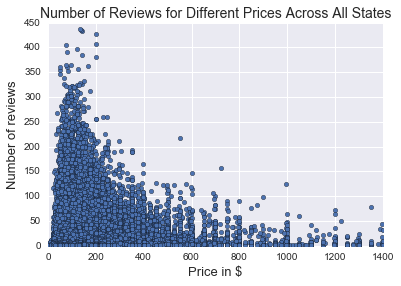

In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.figure(figsize = (8, 3))
price_rw.plot.scatter(x='price',y='id')
plt.xlabel('Price in $',fontsize=13)
plt.ylabel('Number of reviews',fontsize=13)
plt.xlim(0,1400)
plt.ylim(0,450)
sns.plt.title('Number of Reviews for Different Prices Across All States',fontsize=14)

plt.savefig('scatterplot.png',bbox_inches='tight')
plt.show()